In [1]:
import sys, time
import pandas as pd
import datetime as dt
import networkx as nx
import matplotlib.pyplot as plt

from IPython.display import display

import plotly.plotly as py # interactive graphing
from plotly.graph_objs import Bar, Scatter, Marker, Layout

In [2]:
pd.options.display.max_rows = 100

In [3]:
df_spprev_em_investimento_imobiliário= pd.read_excel('spprev_em_investimento_imobiliário.xlsx')

In [4]:
df_spprev_em_investimento_imobiliário

,id_parlamentar,Parlamentar,Sigla,Partido,Voto
0,0,ABELARDO CAMARINHA,40,PSB,Sim
1,1,ADILSON ROSSI,40,PSB,Sim
2,2,AFONSO LOBATO,43,PV,Sim
3,3,ALDO DEMARCHI,25,DEM,Sim
4,4,ANA DO CARMO,13,PT,Obstrucao
5,5,ANALICE FERNANDES,45,PSDB,Sim
6,6,ANDRE DO PRADO,22,PR,Sim
7,7,ANDRE SOARES,25,DEM,Obstrucao
8,8,ANTONIO SALIM CURIATI,11,PP,Sim
9,9,BETH SAHAO,13,PT,Nao


In [5]:
df = df_spprev_em_investimento_imobiliário

# Data preparation

### Votação SPPREV

#### Ementa:	Autoriza a participação da São Paulo Previdência - SPPREV em Fundo de Investimento Imobiliário e dá outras providências.

#### Indexadores: AUTORIZAÇÃO, FUNDO DE INVESTIMENTO IMOBILIÁRIO, PARTICIPAÇÃO, SÃO PAULO PREVIDÊNCIA - SPPREV

In [6]:
column_edge = 'Voto'
column_ID = 'id_parlamentar'

data_to_merge = df[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates() # select columns, remove NaN

# To create connections between people who have the same number,
# join data with itself on the 'ID' column.
data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

In [7]:
# By joining the data with itself, people will have a connection with themselves.
# Remove self connections, to keep only connected people who are different.
d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]
    
# To avoid counting twice the connections (person 1 connected to person 2 and person 2 connected to person 1)
# we force the first ID to be "lower" then ID_2
d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [8]:
G = nx.from_pandas_edgelist(df=d, source=column_ID, target=column_ID+'_2', edge_attr=column_edge)

G.add_nodes_from(nodes_for_adding=df.id_parlamentar.tolist())

In [9]:
G.nodes()

NodeView((0, 1, 2, 3, 5, 6, 8, 10, 11, 14, 15, 16, 17, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 40, 41, 44, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 58, 61, 62, 63, 64, 65, 66, 70, 71, 73, 74, 75, 77, 78, 80, 82, 83, 84, 85, 87, 88, 89, 90, 92, 93, 4, 7, 13, 19, 20, 26, 32, 38, 60, 67, 68, 72, 76, 81, 86, 9, 12, 42, 43, 45, 69, 91, 18, 39, 54, 55, 59, 79))

### Partidos

In [10]:
column_edge = 'Partido'
column_ID = 'id_parlamentar'

data_to_merge = df[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates()

data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]

d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [11]:
# Create the connections in the graph
links_attributes = {tuple(row[[column_ID, column_ID+"_2"]]): {column_edge: row[column_edge]} for i,row in d.iterrows()}

G.add_edges_from(links_attributes) # create the connection, without attribute. Check it with G.get_edge_data(3,5)
nx.set_edge_attributes(G=G, values=links_attributes) # adds the attribute. Check it with G.get_edge_data(3,5)

# Graph analysis

### Drawing graphs

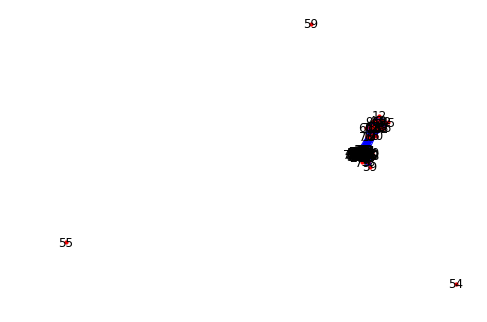

In [15]:
nx.draw(G, node_size=10, edge_color='b', edge_width=1, with_labels=True, node_label_position ='top center')
